# Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from the number of fire in the city of Chicago

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import time
import xlrd

import utils

DATA_FILE = 'examples/data/fire_theft.xls'

In [5]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

# Step 4: build model to predict Y
Y_predicted = X * w + b 

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')
# loss = utils.huber_loss(Y, Y_predicted)

# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [6]:
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs
		total_loss = 0
		for x, y in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	w, b = sess.run([w, b]) 

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

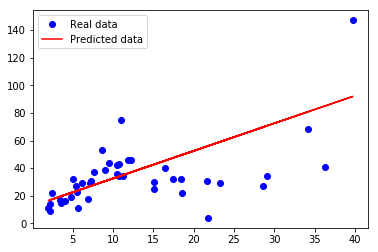

In [7]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [20]:
# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 10
features = 784

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('examples/data/mnist', one_hot=True) 

# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9. 
# Features are of the type float, and labels are of the type int
X = tf.placeholder(tf.float32, shape=[batch_size,features], name='X')
Y = tf.placeholder(tf.float32, shape=[batch_size,10], name='y')

# Step 3: create weights and bias
# weights and biases are initialized to 0
# shape of w depends on the dimension of X and Y so that Y = X * w + b
# shape of b depends on Y
W = tf.Variable(tf.random_normal(shape=[features, 10], stddev=0.01), name="W")
b = tf.Variable(tf.zeros([1,10]), name="b")

# Step 4: build model
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE
logits = tf.matmul(X, w) + b 

# Step 5: define loss function
# use cross entropy loss of the real labels with the softmax of logits
# use the method:
# tf.nn.softmax_cross_entropy_with_logits(logits, Y)
# then use tf.reduce_mean to get the mean loss of the batch
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y, name='loss')
loss = tf.reduce_mean(entropy)
# Step 6: define training op
# using gradient descent to minimize loss

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)


Extracting examples/data/mnist/train-images-idx3-ubyte.gz
Extracting examples/data/mnist/train-labels-idx1-ubyte.gz
Extracting examples/data/mnist/t10k-images-idx3-ubyte.gz
Extracting examples/data/mnist/t10k-labels-idx1-ubyte.gz


In [24]:
with tf.Session() as sess:
	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			# TO-DO: run optimizer + fetch loss_batch
			_, loss_batch = sess.run([optimizer, loss], feed_dict={X: X_batch, Y:Y_batch}) 
			total_loss += loss_batch
		print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print('Total time: {0} seconds'.format(time.time() - start_time))

	print('Optimization Finished!') # should be around 0.35 after 25 epochs

	# test the model
	preds = tf.nn.softmax(logits)
	correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y, 1))
	accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
	
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	
	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		accuracy_batch = sess.run([accuracy], feed_dict={X: X_batch, Y:Y_batch}) 
		for sample in accuracy_batch:
			total_correct_preds += sample
	
	print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Average loss epoch 0: 0.3677233678824974
Average loss epoch 1: 0.2955295623633967
Average loss epoch 2: 0.28457940955123145
Average loss epoch 3: 0.2775354919942109
Average loss epoch 4: 0.27692182804946297
Average loss epoch 5: 0.2685388233208712
Average loss epoch 6: 0.26827583950021605
Average loss epoch 7: 0.26931019637968157
Average loss epoch 8: 0.2670388543383503
Average loss epoch 9: 0.26205834440695935
Total time: 5.565326929092407 seconds
Optimization Finished!
Accuracy 0.9224
